In [1]:
import pandas as pd
import torch
import os
import sys
from torch.utils.data import DataLoader
import time
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from dataset_PAMAP2 import dataset_PAMAP2

In [2]:
no_id_list=[108,109]
dataset=dataset_PAMAP2(no_id_list)

In [3]:
#import importlib
#importlib.reload(dataset_PAMAP2)

In [14]:
activity_list=[1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24] #[3,4,12,13]
id_test=103
batch_size=16
stepsize=128
train_data,test_data=dataset.load_as_DataLoader_with_all_attributes(activity_list,id_test,stepsize,batch_size)

In [19]:
import matplotlib.pyplot as plt
import numpy as np
def plot_accuracies(test_acc_List,stepsize):
    res=test_acc_List
    fig=plt.figure(figsize=(10, 6))
    ax=plt.subplot(polar=True)
    
    ax.set_ylim(0.4,1)
    ax.set_yticks(np.arange(0.5,1,0.1))
    
    
    id_tests=[101,102,103,104,105,106,107]

    res.append(res[0])
    angles=[i*360/len(id_tests) for i in range(len(id_tests))]
    lines, labels = plt.thetagrids(angles, (id_tests))

    theta = np.linspace(0, 2 * np.pi, len(res))
    plt.plot(theta, res)

    #plt.fill(theta, actual, 'b', alpha=0.1)
    #plt.legend(labels=('Actual'), loc=1)
    
    plt.title("Step = "+str(stepsize))
    plt.show(fig)
    fig.savefig("18_activities_Step_"+str(stepsize)+".png")
    plt.close(fig) 

# Apprentissage

In [20]:
import models
import importlib
importlib.reload(models)
import pytorch_lightning as pl 
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [21]:
def train_model(model, clipping, num_epochs, data_loader_train, data_loader_val, data_loader_test):

    early_stop_callback = EarlyStopping(
      monitor='valid_accuracy',
      min_delta=0.00,
      patience=10,
      verbose=False,
      mode='max'
    )
    trainer = Trainer(max_epochs=num_epochs, gradient_clip_val= clipping, progress_bar_refresh_rate = 40, gpus=1, callbacks=[early_stop_callback])
    trainer.fit(model, data_loader_train, data_loader_val)
    final_results = trainer.logged_metrics
    final_results["test"] = trainer.test(model, data_loader_test)[0]
    final_results["num_epochs"] = trainer.current_epoch
    final_results["num_parameters"] = model.num_paramaters
    return final_results

In [18]:
model = models.MultiChannelBase(40, [5,5], 256, len(activity_list), lr = 0.001, betas = (0.9, 0.999), eps = 1e-8)
res=train_model(model, 1, 50, train_data,test_data,test_data)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8792592883110046,
 'test_accuracy_epoch': 0.8792592883110046,
 'test_batch_time': 0.004986763000488281,
 'test_batch_time_epoch': 0.0041115074418485165,
 'test_loss': 0.25992026925086975,
 'test_loss_epoch': 1.0352895259857178}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7407024502754211,
 'test_accuracy_epoch': 0.7407024502754211,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004153852816671133,
 'test_loss': 4.852890968322754,
 'test_loss_epoch': 6.121604919433594}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  101  Test Accuracy :  0.7407024502754211


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7465686202049255,
 'test_accuracy_epoch': 0.7465686202049255,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0035827879328280687,
 'test_loss': 7.553493022918701,
 'test_loss_epoch': 1.776146411895752}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  102  Test Accuracy :  0.7465686202049255


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9111111164093018,
 'test_accuracy_epoch': 0.9111111164093018,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004209244158118963,
 'test_loss': 0.0001490644208388403,
 'test_loss_epoch': 0.6670811772346497}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  103  Test Accuracy :  0.9111111164093018


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8930361866950989,
 'test_accuracy_epoch': 0.8930361866950989,
 'test_batch_time': 0.005013942718505859,
 'test_batch_time_epoch': 0.004928166046738625,
 'test_loss': 1.3390973435889464e-05,
 'test_loss_epoch': 0.489380419254303}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  104  Test Accuracy :  0.8930361866950989


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.5982946753501892,
 'test_accuracy_epoch': 0.5982946753501892,
 'test_batch_time': 0.015621423721313477,
 'test_batch_time_epoch': 0.003813896793872118,
 'test_loss': 1.7154841423034668,
 'test_loss_epoch': 3.20853590965271}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  105  Test Accuracy :  0.5982946753501892


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8895198702812195,
 'test_accuracy_epoch': 0.8895198702812195,
 'test_batch_time': 0.003988981246948242,
 'test_batch_time_epoch': 0.004093467257916927,
 'test_loss': 0.0,
 'test_loss_epoch': 1.8427248001098633}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  106  Test Accuracy :  0.8895198702812195


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9150943160057068,
 'test_accuracy_epoch': 0.9150943160057068,
 'test_batch_time': 0.003988027572631836,
 'test_batch_time_epoch': 0.004013703670352697,
 'test_loss': 2.2594923973083496,
 'test_loss_epoch': 0.6978210806846619}
--------------------------------------------------------------------------------
stepsize :  128  id_test :  107  Test Accuracy :  0.9150943160057068


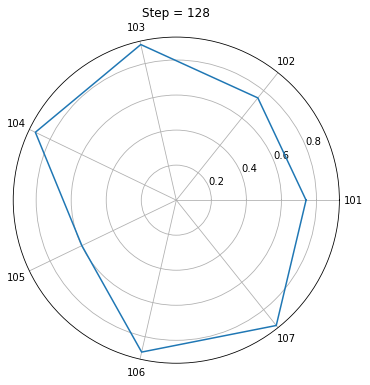

[0.7407024502754211, 0.7465686202049255, 0.9111111164093018, 0.8930361866950989, 0.5982946753501892, 0.8895198702812195, 0.9150943160057068, 0.7407024502754211]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7209422588348389,
 'test_accuracy_epoch': 0.7209422588348389,
 'test_batch_time': 0.00403594970703125,
 'test_batch_time_epoch': 0.004243645817041397,
 'test_loss': 13.560112953186035,
 'test_loss_epoch': 11.408573150634766}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  101  Test Accuracy :  0.7209422588348389


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7857142686843872,
 'test_accuracy_epoch': 0.7857142686843872,
 'test_batch_time': 0.003970146179199219,
 'test_batch_time_epoch': 0.004158820956945419,
 'test_loss': 1.6943130493164062,
 'test_loss_epoch': 1.6556082963943481}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  102  Test Accuracy :  0.7857142686843872


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.890949547290802,
 'test_accuracy_epoch': 0.890949547290802,
 'test_batch_time': 0.01621556282043457,
 'test_batch_time_epoch': 0.003618379822000861,
 'test_loss': 0.0,
 'test_loss_epoch': 1.0066404342651367}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  103  Test Accuracy :  0.890949547290802


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8542713522911072,
 'test_accuracy_epoch': 0.8542713522911072,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004586667753756046,
 'test_loss': 1.124005675315857,
 'test_loss_epoch': 0.7161300778388977}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  104  Test Accuracy :  0.8542713522911072


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.4455516040325165,
 'test_accuracy_epoch': 0.4455516040325165,
 'test_batch_time': 0.015627145767211914,
 'test_batch_time_epoch': 0.003646929282695055,
 'test_loss': 5.068609714508057,
 'test_loss_epoch': 4.951787948608398}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  105  Test Accuracy :  0.4455516040325165


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8823072910308838,
 'test_accuracy_epoch': 0.8823072910308838,
 'test_batch_time': 0.003988027572631836,
 'test_batch_time_epoch': 0.0039080060087144375,
 'test_loss': 0.21863269805908203,
 'test_loss_epoch': 0.8577624559402466}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  106  Test Accuracy :  0.8823072910308838


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8512649536132812,
 'test_accuracy_epoch': 0.8512649536132812,
 'test_batch_time': 0.01565241813659668,
 'test_batch_time_epoch': 0.0035346955992281437,
 'test_loss': 0.16617915034294128,
 'test_loss_epoch': 1.3341100215911865}
--------------------------------------------------------------------------------
stepsize :  64  id_test :  107  Test Accuracy :  0.8512649536132812


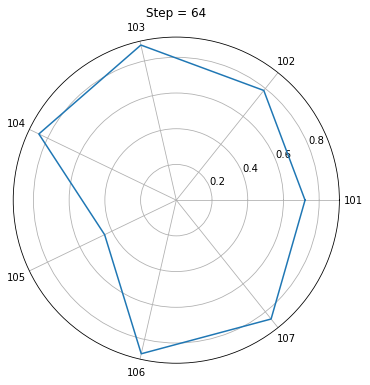

[0.7209422588348389, 0.7857142686843872, 0.890949547290802, 0.8542713522911072, 0.4455516040325165, 0.8823072910308838, 0.8512649536132812, 0.7209422588348389]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.728108823299408,
 'test_accuracy_epoch': 0.728108823299408,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004661981016397476,
 'test_loss': 13.521992683410645,
 'test_loss_epoch': 10.114197731018066}
--------------------------------------------------------------------------------
stepsize :  32  id_test :  101  Test Accuracy :  0.728108823299408


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7234643697738647,
 'test_accuracy_epoch': 0.7234643697738647,
 'test_batch_time': 0.003989219665527344,
 'test_batch_time_epoch': 0.004673467483371496,
 'test_loss': 9.192346572875977,
 'test_loss_epoch': 4.52726411819458}
--------------------------------------------------------------------------------
stepsize :  32  id_test :  102  Test Accuracy :  0.7234643697738647


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9237194061279297,
 'test_accuracy_epoch': 0.9237194061279297,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.003455039579421282,
 'test_loss': 0.48126205801963806,
 'test_loss_epoch': 0.45252692699432373}
--------------------------------------------------------------------------------
stepsize :  32  id_test :  103  Test Accuracy :  0.9237194061279297


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.912824809551239,
 'test_accuracy_epoch': 0.912824809551239,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0038751952815800905,
 'test_loss': 0.5883648991584778,
 'test_loss_epoch': 0.6383140683174133}
--------------------------------------------------------------------------------
stepsize :  32  id_test :  104  Test Accuracy :  0.912824809551239


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.5914055109024048,
 'test_accuracy_epoch': 0.5914055109024048,
 'test_batch_time': 0.005978822708129883,
 'test_batch_time_epoch': 0.005383941810578108,
 'test_loss': 7.334139347076416,
 'test_loss_epoch': 3.6793315410614014}
--------------------------------------------------------------------------------
stepsize :  32  id_test :  105  Test Accuracy :  0.5914055109024048


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8991847038269043,
 'test_accuracy_epoch': 0.8991847038269043,
 'test_batch_time': 0.0079498291015625,
 'test_batch_time_epoch': 0.004355105571448803,
 'test_loss': 0.7043187022209167,
 'test_loss_epoch': 1.0119373798370361}
--------------------------------------------------------------------------------
stepsize :  32  id_test :  106  Test Accuracy :  0.8991847038269043


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.9004310965538025,
 'test_accuracy_epoch': 0.9004310965538025,
 'test_batch_time': 0.01562786102294922,
 'test_batch_time_epoch': 0.00412712199613452,
 'test_loss': 0.8419155478477478,
 'test_loss_epoch': 0.7190753221511841}
--------------------------------------------------------------------------------
stepsize :  32  id_test :  107  Test Accuracy :  0.9004310965538025


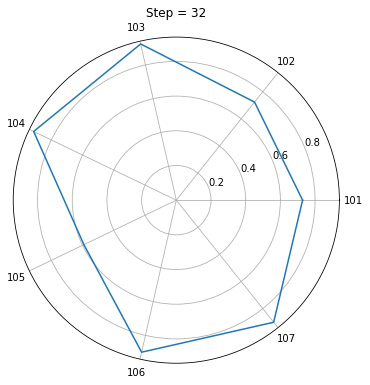

[0.728108823299408, 0.7234643697738647, 0.9237194061279297, 0.912824809551239, 0.5914055109024048, 0.8991847038269043, 0.9004310965538025, 0.728108823299408]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.6923176646232605,
 'test_accuracy_epoch': 0.6923176646232605,
 'test_batch_time': 0.00691986083984375,
 'test_batch_time_epoch': 0.0059032742865383625,
 'test_loss': 12.541933059692383,
 'test_loss_epoch': 13.453060150146484}
--------------------------------------------------------------------------------
stepsize :  16  id_test :  101  Test Accuracy :  0.6923176646232605


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7213175296783447,
 'test_accuracy_epoch': 0.7213175296783447,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.0039358860813081264,
 'test_loss': 3.8030359745025635,
 'test_loss_epoch': 5.492371559143066}
--------------------------------------------------------------------------------
stepsize :  16  id_test :  102  Test Accuracy :  0.7213175296783447


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | train_acc  | Accuracy   | 0     
1 | valid_acc  | Accuracy   | 0     
2 | test_acc   | Accuracy   | 0     
3 | conv       | Sequential | 16.2 K
4 | classifier | Sequential | 46.1 K
------------------------------------------
62.3 K    Trainable params
0         Non-trainable params
62.3 K    Total params
0.249     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.8905496001243591,
 'test_accuracy_epoch': 0.8905496001243591,
 'test_batch_time': 0.0,
 'test_batch_time_epoch': 0.004487327765673399,
 'test_loss': 1.2279834747314453,
 'test_loss_epoch': 1.1137707233428955}
--------------------------------------------------------------------------------
stepsize :  16  id_test :  103  Test Accuracy :  0.8905496001243591


Exception ignored in: <function tqdm.__del__ at 0x0000022CE6B8BCA8>
Traceback (most recent call last):
  File "C:\Users\axelc\Anaconda3\envs\pytorch\lib\site-packages\tqdm\std.py", line 1145, in __del__
    self.close()
KeyboardInterrupt
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\axelc\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-7eeb10266410>", line 12, in <module>
    train_data,test_data=dataset.load_as_DataLoader_with_all_attributes(activity_list,id_test,stepsize,batch_sizes[stepsize])
  File "C:\Users\axelc\Desktop\Cours\INF8225\TP4\multi-timeseries-classification-base-model\dataset_PAMAP2.py", line 192, in load_as_DataLoader_with_all_attributes
    train,test=self.load_as_ListOfTensor_with_all_attributes(activity_list,id_test,stepsize)
  File "C:\Users\axelc\Desktop\Cours\INF8225\TP4\multi-timeseries-classification-base-model\dataset_PAMAP2.py", line 184, in load_as_ListOfTensor_with_all_attributes
    train.append((x_train[i].type(torch.FloatTensor),y_train2[i])) #[2:5].type(torch.FloatTensor),y_train2[i]))
KeyboardInterrupt

During handling of the above exception, a

KeyboardInterrupt: 

In [22]:
activity_list=[1,2,3,4,5,6,7,9,10,11,12,13,16,17,18,19,20,24] #[3,4,12,13]
batch_size=32
batch_sizes={8:256,16:128,32:64,64:32,128:16}


id_tests=[101,102,103,104,105,106,107]
stepsizes=[128,64,32,16,8]
results=[]
for stepsize in stepsizes:
    for id_test in id_tests:
        
        train_data,test_data=dataset.load_as_DataLoader_with_all_attributes(activity_list,id_test,stepsize,batch_sizes[stepsize])
        model = models.MultiChannelBase(40, [5,5], 256, len(activity_list), lr = 0.001, betas = (0.9, 0.999), eps = 1e-8)
        res=train_model(model, 1, 50, train_data,test_data,test_data)
        print("stepsize : ",stepsize," id_test : ",id_test," Test Accuracy : ",res['test']['test_accuracy'])
        results.append(res['test']['test_accuracy'])
        del model
        torch.cuda.empty_cache()
    plot_accuracies(results,stepsize)
    print(results)
    results=[]

In [35]:
import matplotlib.pyplot as plt
import numpy as np
def plot_accuracies(test_acc_List,stepsize):
    res=test_acc_List
    fig=plt.figure(figsize=(6, 6))
    
    
    id_tests=[101,102,103,104,105,106,107]

    res.append(res[0])
    angles=[i*360/len(id_tests) for i in range(len(id_tests))]
    lines, labels = plt.thetagrids(angles, (id_tests))

    theta = np.linspace(0, 2 * np.pi, len(res))
    plt.plot(theta, res)

    #plt.fill(theta, actual, 'b', alpha=0.1)
    #plt.legend(labels=('Actual'), loc=1)
    
    plt.title("Step = "+str(stepsize))
    plt.show(fig)
    fig.savefig("18_activities_Step_"+str(stepsize)+".png")
    plt.close(fig) 

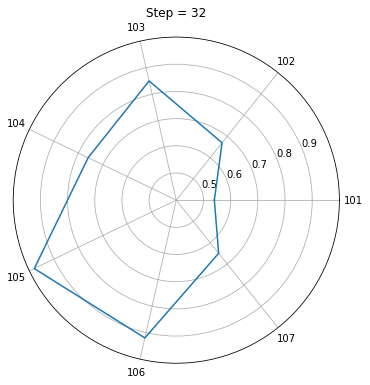

In [39]:
a=[0.54,0.67,0.85,0.76,0.98,0.92,0.65]
plot_accuracies(a,32)